In [1]:
import calmap
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import datetime
from IPython.display import display

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.labelpad'] = 3
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'black'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.edgecolor'] = '#808080'
plt.rcParams['xtick.color'] = '#808080'
plt.rcParams['ytick.color'] = '#808080'
plt.rcParams['grid.color'] = '#808080'
plt.rcParams['grid.linestyle'] = ':' # '-', '--', '-.', ':'

# pd.set_option("display.max_columns", None)

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
icloud = '/Users/a201510003/Library/Mobile Documents/com~apple~CloudDocs/백업/Life-Log/'
satisfaction = '%s/만족도.csv' % icloud
weather = '%s/날씨.csv' % icloud
sleep = '%s/수면시간.csv' % icloud
game = '%s/게임.csv' % icloud
workout = '%s/운동.csv' % icloud
work_hours = '%s/일한 시간.csv' % icloud
reading = '%s/책 읽기.csv' % icloud
diary = '%s/일기.csv' % icloud
organizing_knowledge = '%s/지식 정리.csv' % icloud
drinking = '%s/음주.csv' % icloud

df_satisfaction = pd.read_csv(satisfaction)
df_weather = pd.read_csv(weather)
df_sleep = pd.read_csv(sleep)
df_game = pd.read_csv(game)
df_workout = pd.read_csv(workout)
df_work_hours = pd.read_csv(work_hours)
df_reading = pd.read_csv(reading)
df_diary = pd.read_csv(diary)
df_organizing_knowledge = pd.read_csv(organizing_knowledge)
df_drinking = pd.read_csv(drinking)

In [4]:
df_satisfaction.fillna('', inplace=True)
#display(df_satisfaction.tail(5))

In [5]:
df_weather['최저 기온'] = df_weather['최저 기온'].str.strip('°C')
df_weather['최저 기온'] = pd.to_numeric(df_weather['최저 기온'])
df_weather['최고 기온'] = df_weather['최고 기온'].str.strip('°C')
df_weather['최고 기온'] = pd.to_numeric(df_weather['최고 기온'])
df_weather['강수 확률'] = pd.to_numeric(df_weather['강수 확률']) * 100
df_weather['강수량'] = df_weather['강수량'].str.strip('m')
df_weather['강수량'] = pd.to_numeric(df_weather['강수량']) * 1000
df_weather.rename(
    columns={'최저 기온': '최저 기온(°C)', '최고 기온': '최고 기온(°C)', '강수 확률': '강수 확률(%)', '강수량': '강수량(mm)'},
    inplace=True
)
#display(df_weather)
df_weather.drop('체감 온도', axis=1, inplace=True)

In [6]:
df_sleep['수면 시간'] = pd.to_timedelta(df_sleep['수면 시간'], unit='h')
df_sleep['수면 점수'].fillna(0, inplace=True)
df_sleep['수면 방해 요인'].fillna('', inplace=True)
#display(df_sleep.tail(5))

In [7]:
df_game['게임'] = df_game['게임'].map({'N': False, 'Y': True})
#display(df_game.tail(5))

In [8]:
# df_workout = df_workout.groupby(['날짜'])['운동 강도'].apply(list).reset_index(name='운동 강도')
all_workout_types = pd.unique(df_workout['운동 강도'])
df_workout = df_workout.groupby(['날짜', '운동 강도']).size().unstack(level=1)
df_workout['운동 횟수'] = df_workout.agg(sum, axis=1)
df_workout['운동'] = True
df_workout.fillna(0, inplace=True)
#display(df_workout.tail(5))

In [9]:
df_work_hours['생산성 기록 시간'] = pd.to_timedelta(df_work_hours['생산성 기록 시간'])
df_work_hours['근무 시간'].fillna(
    pd.to_datetime(df_work_hours['날짜']).dt.weekday.map({0: 8, 1: 8, 2: 8, 3: 8, 4: 8, 5: 0, 6: 0}),
    inplace=True
)
df_work_hours['근무 시간'] = pd.to_timedelta(df_work_hours['근무 시간'], unit='h')
#display(df_work_hours.tail(5))

In [10]:
df_reading['독서'] = df_reading['독서'].map({'N': False, 'Y': True})
#display(df_reading.tail(5))

In [11]:
df_diary['일기'] = df_diary['일기'].map({'N': False, 'Y': True})
#display(df_diary.tail(5))

In [12]:
df_organizing_knowledge['지식 정리'] = df_organizing_knowledge['지식 정리'].map({'N': False, 'Y': True})
#display(df_organizing_knowledge.tail(5))

In [13]:
# df_drinking = df_drinking.groupby(['날짜']).agg({
#     '음주 종류': lambda x: x.tolist(),
#     '음주량': lambda x: x.tolist()
# }).reset_index()
all_drink_types = pd.unique(df_drinking['음주 종류'])
df_drinking = df_drinking.groupby(['날짜', '음주 종류']).agg(sum).unstack(level=1)
df_drinking.columns = df_drinking.columns.droplevel(0)
df_drinking = df_drinking.rename_axis(None, axis=1)
df_drinking['음주량'] = df_drinking.agg(sum, axis=1)
df_drinking['금주'] = False
df_drinking['음주'] = True
df_drinking.fillna(0, inplace=True)
#display(df_drinking.tail(5))

In [14]:
df = pd.merge(left=df_satisfaction, right=df_weather, how='outer', on='날짜')
df = pd.merge(left=df, right=df_sleep, how='outer', on='날짜')
df = pd.merge(left=df, right=df_game, how='outer', on='날짜')
df = pd.merge(left=df, right=df_workout, how='outer', on='날짜')
df = pd.merge(left=df, right=df_work_hours, how='outer', on='날짜')
df = pd.merge(left=df, right=df_reading, how='outer', on='날짜')
df = pd.merge(left=df, right=df_diary, how='outer', on='날짜')
df = pd.merge(left=df, right=df_organizing_knowledge, how='outer', on='날짜')
df = pd.merge(left=df, right=df_drinking, how='outer', on='날짜')

In [15]:
def datetime_to_str(datetime):
    return datetime.strftime('%Y-%m-%d')

df['날짜'] = pd.to_datetime(df['날짜'])
df['저강도'].fillna(0, inplace=True)
df['중강도'].fillna(0, inplace=True)
df['운동'].fillna(False, inplace=True)
df['막걸리'].fillna(0, inplace=True)
df['맥주'].fillna(0, inplace=True)
df['소주'].fillna(0, inplace=True)
df['와인'].fillna(0, inplace=True)
df['금주'].fillna(True, inplace=True)

df.set_index('날짜', inplace=True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76 entries, 2023-06-16 to 2023-08-30
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   만족 점수      74 non-null     float64        
 1   만족 점수(그림)  74 non-null     object         
 2   만족 방해 요인   74 non-null     object         
 3   최저 기온(°C)  56 non-null     float64        
 4   최고 기온(°C)  56 non-null     float64        
 5   자외선 지수     56 non-null     float64        
 6   강수 확률(%)   56 non-null     float64        
 7   강수량(mm)    56 non-null     float64        
 8   습도         56 non-null     float64        
 9   대기질 카테고리   56 non-null     object         
 10  대기질 지수     56 non-null     float64        
 11  기상 상태      55 non-null     object         
 12  일출 시간      55 non-null     object         
 13  일몰 시간      55 non-null     object         
 14  수면 시간      68 non-null     timedelta64[ns]
 15  수면 점수      68 non-null     float64        
 16  수면 방해 요인

None

In [16]:
# 설계/행동/돌아보기 건강(수면, 운동):30, 습관(공부, 일기, 정리, 행복):40, 생산성:30
# 수면: 0-20, 운동: 0-10, 생산성(기록 기반): 0-30, 공부: 0-10, 일기: 0-10, 정리: 0-10, 행복: 0-10, 음주: -?-0

def evaluation_sleep(df):
    zero_time = datetime.timedelta(0)
    
    sleep_time = df['수면 시간']
    sleep_satisfaction = df['수면 점수']
    sleep_score = 0
    if sleep_time > zero_time:
        max_sleep_time = datetime.timedelta(hours=8)
        if sleep_time >= max_sleep_time:
            sleep_score = 20 if sleep_satisfaction == 2 else 17
        else:
            sleep_score = 20 * (sleep_time / max_sleep_time)
    return sleep_score

def evaluation_workout(df):
    workout_score = 0
    for workout_type in all_workout_types:
        value = df[workout_type]
        if value > 0:
            workout_score += {'고강도': 10, '중강도': 7, '저강도': 4}.get(workout_type, 0)
    if workout_score > 10:
        workout_score = 10
    return workout_score

def evaluation_productivity(df):
    productivity_hours = df['생산성 기록 시간']
    productivity_score = 0
    if productivity_hours > datetime.timedelta(0):
        productivity_score = 30 * (productivity_hours / df['근무 시간'])
    else:
        productivity_score = 30
    return productivity_score

def evaluation_satisfaction(df):
    satisfaction_score = {3: 10, 2: 7, 1: 4}.get(df['만족 점수'], 0)
    return satisfaction_score

def evaluation_reading(df):
    reading_score = {True: 10, False: 0}.get(df['독서'], 0)
    return reading_score

def evaluation_dialy(df):
    dialy_score = {True: 10, False: 0}.get(df['일기'], 0)
    return dialy_score

def evaluation_organizing_knowledge(df):
    organizing_knowledge_score = {True: 10, False: 0}.get(df['지식 정리'], 0)
    return organizing_knowledge_score

def evaluating_drink_score(df):
    drink_types = []
    score = 0
    for drink_type in all_drink_types:
        value = df[drink_type]
        if value < 1:
            continue
        
        drink_types.append(drink_type)
        if drink_type == '맥주':
            if value < 500:
                score += 3
            else:
                score += 6
        elif drink_type == '소주':
            if value < 180:
                score += 5
            else:
                score += 10
        else:
            if value < 500:
                score += 4
            else:
                score += 8
    
    if len(drink_types) > 1:
        score += 5
    return -score

def evaluation(df):
    return (df['sleep_score'] + df['workout_score']
            + df['productivity_score'] + df['reading_score'] + df['dialy_score']
            + df['organizing_knowledge_score'] + df['satisfaction_score']
            - df['alcohol_score'])

df['sleep_score'] = df.apply(evaluation_sleep, axis=1)
df['workout_score'] = df.apply(evaluation_workout, axis=1)
df['productivity_score'] = df.apply(evaluation_productivity, axis=1)
df['satisfaction_score'] = df.apply(evaluation_satisfaction, axis=1)
df['reading_score'] = df.apply(evaluation_reading, axis=1)
df['dialy_score'] = df.apply(evaluation_dialy, axis=1)
df['organizing_knowledge_score'] = df.apply(evaluation_organizing_knowledge, axis=1)
df['alcohol_score'] = df.apply(evaluating_drink_score, axis=1)
df['health_score'] = df['sleep_score'] + df['workout_score']
df['habits_score'] = (df['reading_score'] + df['dialy_score']
                      + df['organizing_knowledge_score'] + df['satisfaction_score'])
df['score'] = (df['health_score'] + df['productivity_score'] + df['habits_score']
               + df['alcohol_score'])

In [17]:
bins_dt = pd.date_range('2022-12-31', freq='1Y', periods=3)
bins_str = bins_dt.astype(str).values
labels = ['{}'.format(bins_str[i].split('-')[0]) for i in range(1, len(bins_str))]
df['year_cat'] = pd.cut(df.index, bins=bins_dt, right=True, labels=labels)
# display(df)

# 평가 점수의 변화 관찰

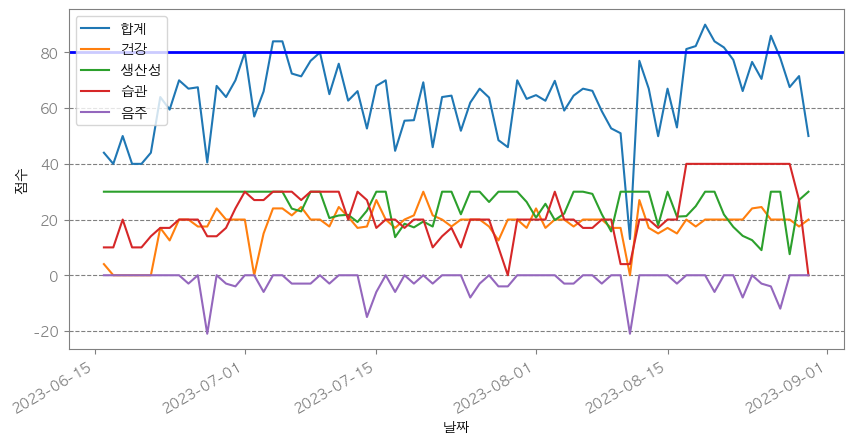

In [18]:
plt.figure(figsize=(10, 5))
df['score'].plot(label='합계')
df['health_score'].plot(label='건강')
df['productivity_score'].plot(label='생산성')
df['habits_score'].plot(label='습관')
df['alcohol_score'].plot(label='음주')
plt.legend(loc='best')
plt.grid(axis='x')
plt.grid(axis='y', which='major', linestyle='--')
# plt.grid(axis='y', which='minor', linestyle='--', linewidth=0.3)
# plt.minorticks_on()
plt.axhline(y=80, color='blue', linestyle='-', linewidth=2)
plt.ylabel('점수')
plt.show()

# 평가 점수가 가장 높은 날은?

In [19]:
hi_score_index = df['score'].idxmax()
print(f'{datetime_to_str(hi_score_index)}일에 총점수는 {df.loc[hi_score_index, "score"]}점입니다.')
print(f'건강 점수는 {df.loc[hi_score_index, "health_score"]}점이고 \
생산성 점수는 {df.loc[hi_score_index, "productivity_score"]}점, \
습관 점수는 {df.loc[hi_score_index, "habits_score"]}점입니다.')

2023-08-19일에 총점수는 90.0점입니다.
건강 점수는 20.0점이고 생산성 점수는 30.0점, 습관 점수는 40점입니다.


# 습관을 가장 오래 유지했던 기간은?

In [20]:
# Reference:
# https://stackoverflow.com/questions/68718782/find-how-many-consecutive-days-have-a-specific-value-in-pandas
def calculate_consecutive_days(df, column):
    df = df.reset_index()
    s = (df[column] == False | df['날짜'].diff().dt.days.ne(1)).cumsum()
    out = df[df[column] == True].groupby(s)['날짜'].agg(['first', 'last', 'count'])
    out.sort_values('count', ascending=False, inplace=True)
    tple = [tuple(row) for row in out.head(1).to_numpy()]
    return tple[0]

def print_consecutive_days(goals, df, column):
    consecutive_days = calculate_consecutive_days(df, column)
    print(f'{goals}를(을) 오랫동안 지속했던 기간은 {consecutive_days[2]}일 \
({datetime_to_str(consecutive_days[0])} ~ {datetime_to_str(consecutive_days[1])})입니다.')

print_consecutive_days('독서', df, '독서')
print_consecutive_days('일기', df, '일기')
print_consecutive_days('지식 정리', df, '지식 정리')
print_consecutive_days('운동', df, '운동')
print_consecutive_days('금주', df, '금주')
print_consecutive_days('게임', df, '게임')

독서를(을) 오랫동안 지속했던 기간은 21일 (2023-06-21 ~ 2023-07-11)입니다.
일기를(을) 오랫동안 지속했던 기간은 15일 (2023-06-30 ~ 2023-07-14)입니다.
지식 정리를(을) 오랫동안 지속했던 기간은 12일 (2023-08-17 ~ 2023-08-28)입니다.
운동를(을) 오랫동안 지속했던 기간은 4일 (2023-07-04 ~ 2023-07-07)입니다.
금주를(을) 오랫동안 지속했던 기간은 9일 (2023-06-16 ~ 2023-06-24)입니다.
게임를(을) 오랫동안 지속했던 기간은 6일 (2023-06-16 ~ 2023-06-21)입니다.


# 수면 시간 관찰

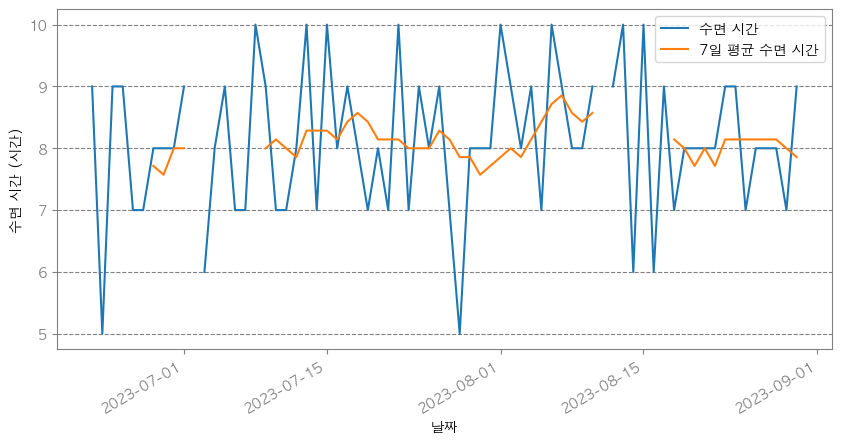

In [21]:
plt.figure(figsize=(10, 5))
(df['수면 시간'] / np.timedelta64(1, 'h')).plot()
(df['수면 시간'] / np.timedelta64(1, 'h')).rolling(7).mean().plot(label='7일 평균 수면 시간')
plt.legend(loc='best')
plt.grid(axis='x')
plt.grid(axis='y', which='major', linestyle='--')
plt.ylabel('수면 시간 (시간)')
plt.show()

# 최근 4주 주단위 활동들을 관찰

In [22]:
# Reference:
# https://stackoverflow.com/questions/46839032/grouping-by-date-range-with-pandas
# https://www.easytweaks.com/pandas-groupby-date-range-time
# https://stackoverflow.com/questions/12589481/multiple-aggregations-of-the-same-column-using-pandas-groupby-agg
# https://stackoverflow.com/questions/19078325/naming-returned-columns-in-pandas-aggregate-function
# https://rfriend.tistory.com/503
# https://note.nkmk.me/en/python-pandas-t-transpose
df_temp = df.groupby(pd.Grouper(freq='W-MON')).agg({
    '수면 시간': [('평균시간', np.mean)],
    '운동': [('일수', np.sum)],
    '독서': [('일수', np.sum)],
    '일기': [('일수', np.sum)],
    '지식 정리': [('일수', np.sum)],
    '음주': [('일수', np.sum)],
    '막걸리': [('합계', np.sum), ('평균', lambda x: np.round(np.mean(x), 1) if not x.empty else 0.0)],
    '맥주': [('합계', np.sum), ('평균', lambda x: np.round(np.mean(x), 1) if not x.empty else 0.0)],
    '소주': [('합계', np.sum), ('평균', lambda x: np.round(np.mean(x), 1) if not x.empty else 0.0)],
    '와인': [('합계', np.sum), ('평균', lambda x: np.round(np.mean(x), 1) if not x.empty else 0.0)],
    'score': [('평균', np.mean)]
})
display(df_temp.tail().transpose())

날짜                         2023-08-07       2023-08-14       2023-08-21  \
수면 시간 평균시간  0 days 08:51:25.714285714  0 days 08:20:00  0 days 08:00:00   
운동    일수                            1                1                0   
독서    일수                            7                5                7   
일기    일수                            0                0                5   
지식 정리 일수                            1                0                5   
음주    일수                            2                2                2   
막걸리   합계                          0.0              0.0              0.0   
      평균                          0.0              0.0              0.0   
맥주    합계                        655.0            960.0            900.0   
      평균                         93.6            137.1            128.6   
소주    합계                          0.0            720.0              0.0   
      평균                          0.0            102.9              0.0   
와인    합계                          0.0              0.0              0.0   
      평균                          0.0              0.0              0.0   
score 평균                    64.861078        52.799107        77.057738   

날짜                         2023-08-28       2023-09-04  
수면 시간 평균시간  0 days 08:08:34.285714285  0 days 08:00:00  
운동    일수                            2                0  
독서    일수                            7             True  
일기    일수                            7             True  
지식 정리 일수                            7            False  
음주    일수                            4                0  
막걸리   합계                        525.0              0.0  
      평균                         75.0              0.0  
맥주    합계                        350.0              0.0  
      평균                         50.0              0.0  
소주    합계                          0.0              0.0  
      평균                          0.0              0.0  
와인    합계                        200.0              0.0  
      평균                         28.6              0.0  
score 평균                    74.599405        60.760937

# 연도별 운동량

In [23]:
df_temp = df[all_workout_types.tolist() + ['year_cat']].groupby(['year_cat']).agg(['sum'])
df_temp.columns = df_temp.columns.set_levels(['합계(회)'], level=1)
df_temp = df_temp.pivot_table(columns='year_cat', values=[('저강도', '합계(회)'), ('중강도', '합계(회)')])
display(df_temp)

,year_cat,2023,2024
저강도,합계(회),11.0,0.0
중강도,합계(회),6.0,0.0


# 연도별 음주량

In [24]:
df_temp = df[all_drink_types.tolist() + ['year_cat']].groupby(['year_cat']).agg(['sum', lambda x: x.sum() / 365])
df_temp.columns = df_temp.columns.set_levels(['합계(ml)','일평균(ml)'], level=1)
df_temp = df_temp.pivot_table(columns='year_cat',
                              values=[
                                  ('맥주', '합계(ml)'), ('맥주', '일평균(ml)'),
                                  ('소주', '합계(ml)'), ('소주', '일평균(ml)'),
                                  ('와인', '합계(ml)'), ('와인', '일평균(ml)')
                              ])
display(df_temp)

year_cat           2023  2024
맥주 일평균(ml)    22.776712   0.0
   합계(ml)   8313.500000   0.0
소주 일평균(ml)     4.438356   0.0
   합계(ml)   1620.000000   0.0
와인 일평균(ml)     5.136986   0.0
   합계(ml)   1875.000000   0.0

# 항목들의 상관관계 관찰

<AxesSubplot: >

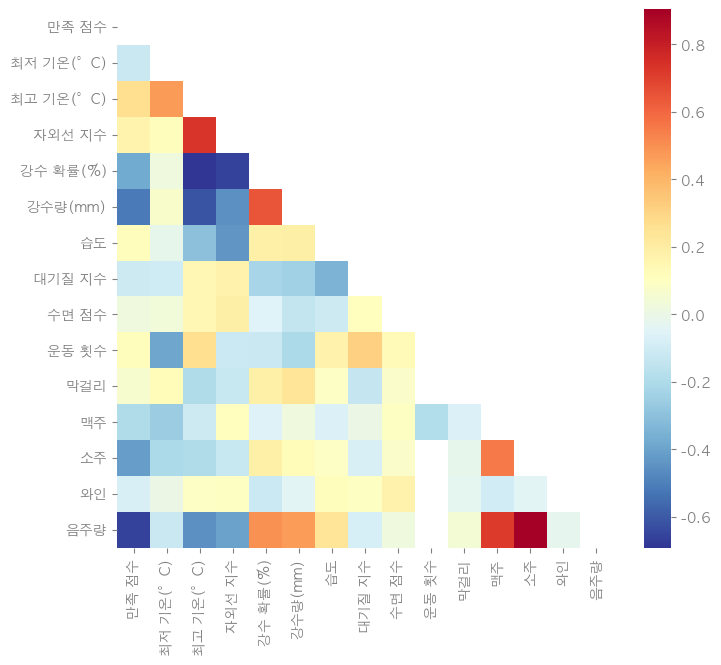

In [25]:
df_temp = df[df['최저 기온(°C)'].notna()]
# display(df_temp)
df_temp = df
df_temp = df_temp.drop(['저강도', '중강도', '운동', '금주', '음주', 'sleep_score', 'workout_score', 'productivity_score', 'satisfaction_score',
                        'reading_score', 'dialy_score', 'organizing_knowledge_score', 'alcohol_score',
                        'health_score', 'habits_score', 'score'],
                       axis=1)
corr = df_temp.corr(numeric_only=True)
# display(corr)
fig, ax = plt.subplots(figsize=(8, 7))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='RdYlBu_r', mask=mask, ax=ax)

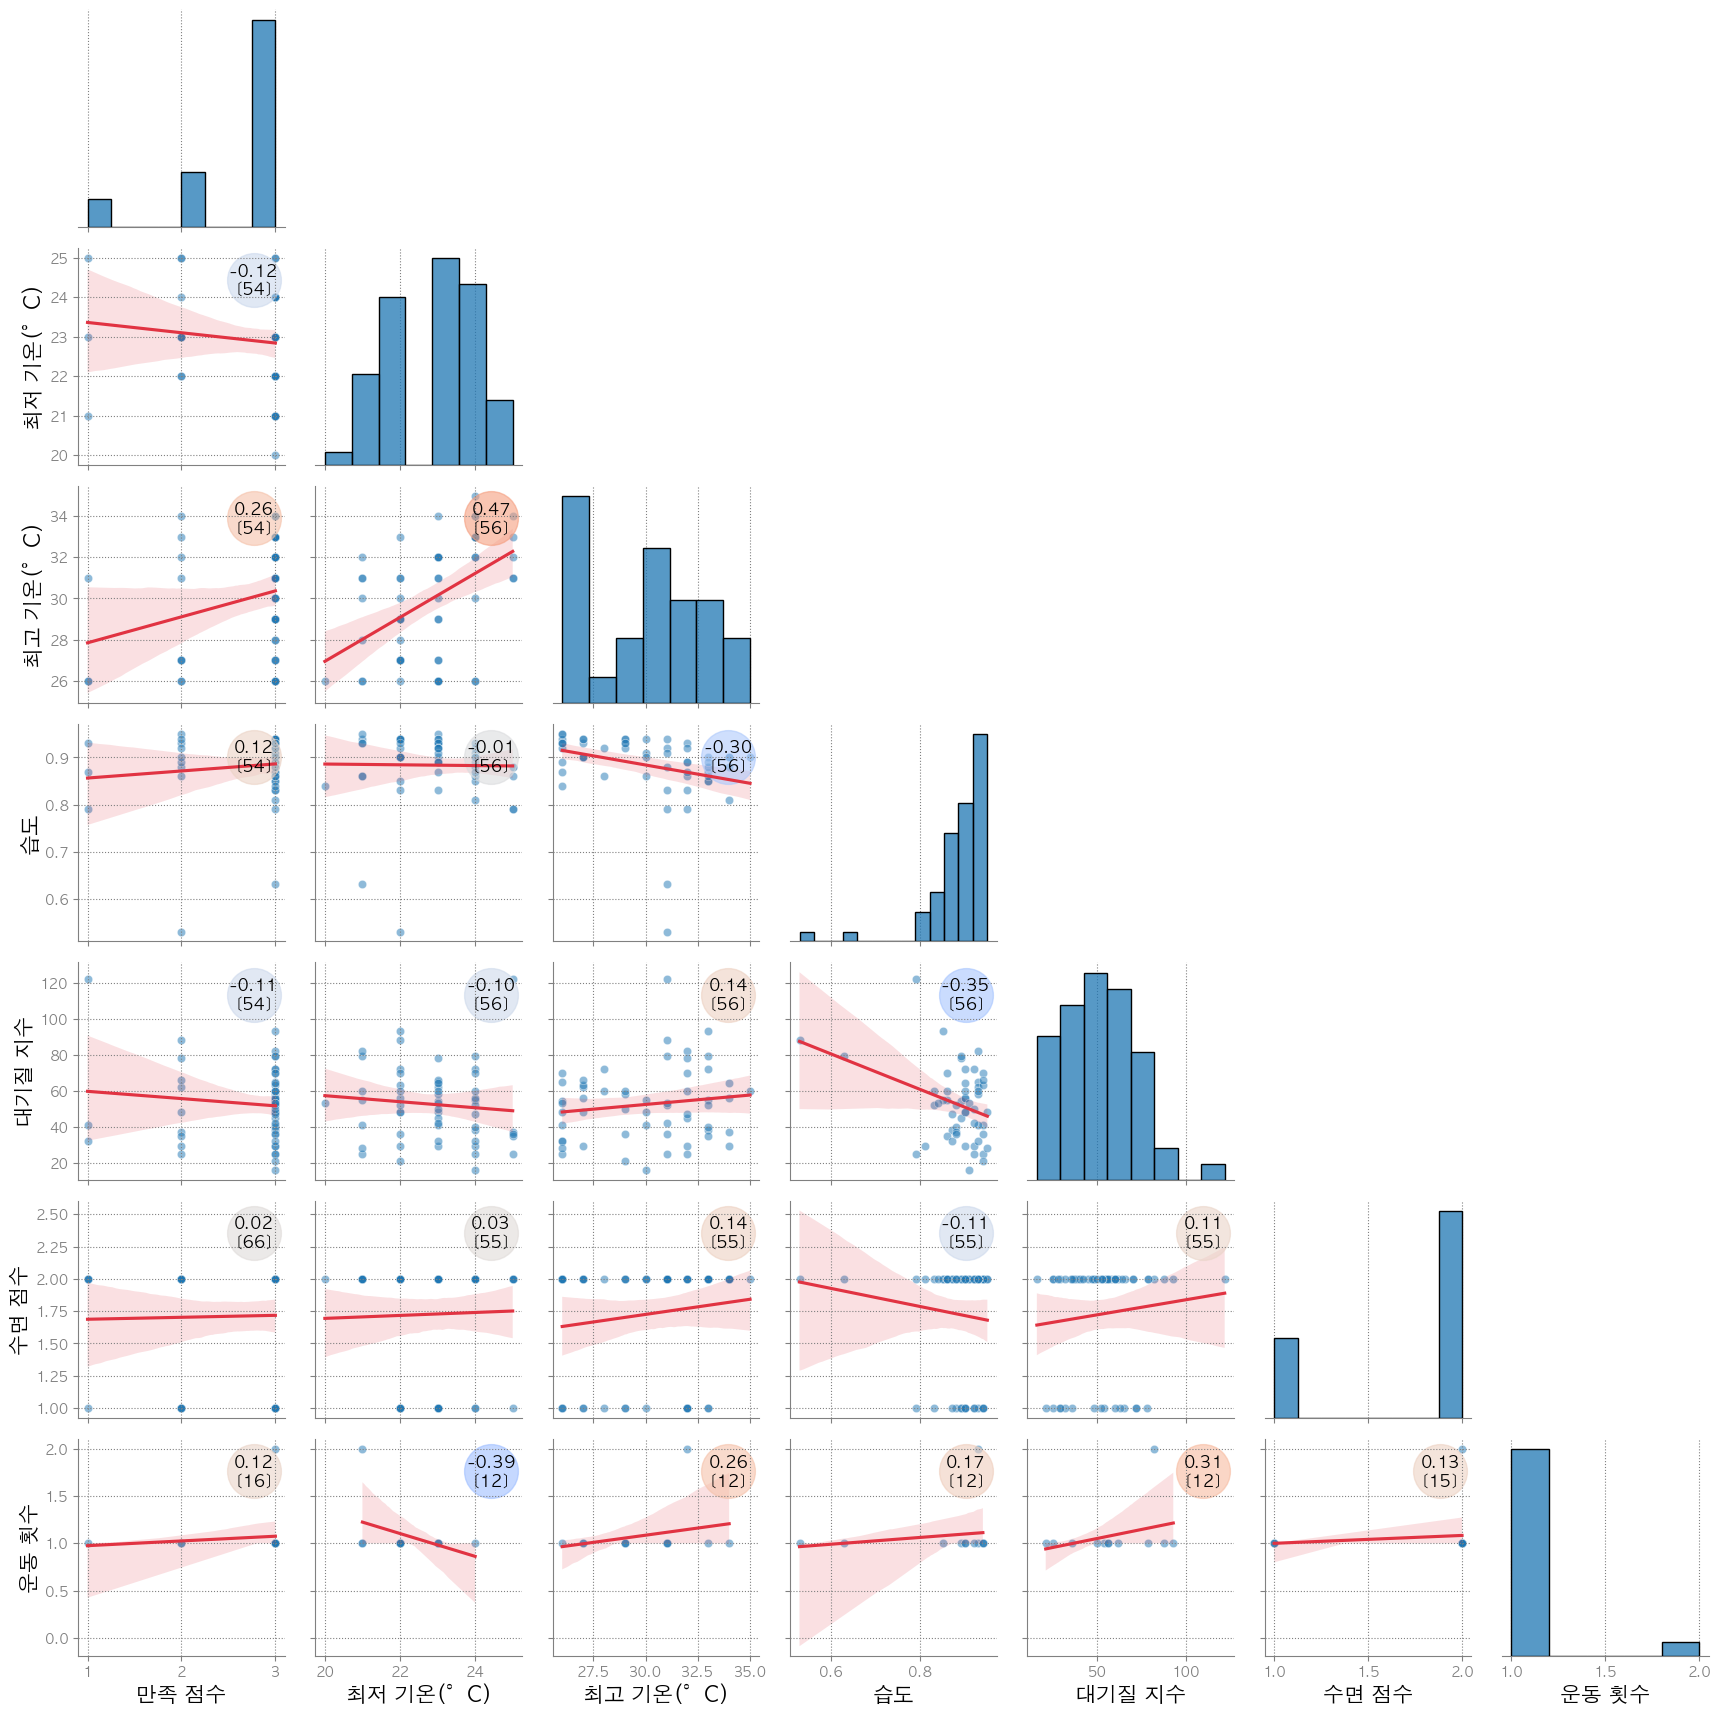

In [26]:
def corrdot(*args, **kwargs):
    temp = pd.DataFrame([args[0], args[1]]).T
    
    # 텍스트를 강조하기 위한 원 만들기
    ax = plt.gca()
    marker_size = 1500 # 원 사이즈
    corr_r = args[0].corr(args[1], 'pearson') # 각 컬럼간 상관관계 구하기
    ax.scatter([.85], [.85], marker_size, [corr_r], alpha=0.6, cmap='coolwarm',
               vmin=-1, vmax=1, transform=ax.transAxes)
    
    # 
    corr_text = f'{corr_r:2.2f}\n[{str(temp.dropna().shape[0])}]'
    
    #
    font_size = 12
    ax.annotate(corr_text, [0.85, 0.85],
                xycoords='axes fraction', ha='center', va='center', fontsize=font_size)

with sns.plotting_context(rc={'axes.labelsize': 15}):
    df_temp = df_temp[['만족 점수', '최저 기온(°C)', '최고 기온(°C)', '습도', '대기질 지수', '수면 점수', '운동 횟수']]
    g = sns.PairGrid(df_temp, diag_sharey=False, corner=True)
    g.map_lower(sns.scatterplot, data=df_temp, alpha=0.5)
    g.map_lower(sns.regplot, data=df_temp, scatter=False, color=sns.color_palette('rocket')[3])
    g.map_lower(corrdot)
    g.map_diag(sns.histplot)

# 점수를 Github의 contributions 형태로 보기

<AxesSubplot: >

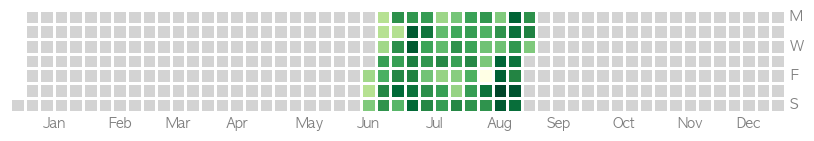

In [27]:
df.reset_index(inplace=True)

data = df[['날짜', 'score']]
data = data.set_index('날짜')
plt.figure(figsize=(10, 5))
calmap.yearplot(
    data['score'],
    cmap='YlGn',
    fillcolor='lightgrey',
    daylabels='MTWTFSS',
    dayticks=[0, 2, 4, 6],
    linewidth=2)